In [1]:
#import required modules
import sys
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# READ IN THE DATA
tsv_file = "wgs-results/unitig_summary.tsv"
unitig_summary = pd.read_table(tsv_file, sep="\t")
# rename #sample_id column
unitig_summary.rename(columns={'#sample_id': 'sample_id'}, inplace=True)
print(unitig_summary.head().to_string())

tsv_file = "wgs-results/mapping_summary-HO_5096_0412.tsv"
mapping_summary = pd.read_table(tsv_file, sep="\t")
print(mapping_summary.head().to_string())
print(mapping_summary.describe().to_string())

   sample_id  unitig_count  base_count  kmer_count  singletons  %single
0  ERR107890          2028     2878647     2893215       75408     2.61
1  ERR111073          2172     2925851     2939090       78399     2.67
2  ERR118571          2115     2851120     2855749       68079     2.38
3  ERR134395          3077     2983556     3035637      144391     4.76
4  ERR156445          2256     2904381     2921325       84624     2.90
   sample_id  filesize_R1  filesize_R2    reads           reference  ref_length  mapped_reads  %mapped  unmapped_reads  %unmapped  average_coverage    Ns   %Ns  variants  snps  nonsyn  syn  intergenic  indels  insertion  deletion  intergenic_indels  genic_indels
0  ERR107890        63.59        62.61   767916  HO_5096_0412.fasta     2832299        706180    91.96           61736       8.04         49.140136   671  0.02       106    87       0    0          87      19          6        13                 19             0
1  ERR111073        54.81        54.02   6

In [3]:
# CLEAN DATA
# identify any problem isolates that you can see from the data
# any gaps in data
missing_values = unitig_summary.isnull()
rows_with_missing_values = missing_values.any(axis=1)
problem_rows_with_missing_values = unitig_summary[rows_with_missing_values]
# no missing values
print(problem_rows_with_missing_values)

# check for rows containing gaps
rows_with_gaps = unitig_summary.applymap(lambda x: str(x).strip() == "").any(axis=1)
problem_rows_with_gaps = unitig_summary[rows_with_gaps]
print(problem_rows_with_gaps)

Empty DataFrame
Columns: [sample_id, unitig_count, base_count, kmer_count, singletons, %single]
Index: []
Empty DataFrame
Columns: [sample_id, unitig_count, base_count, kmer_count, singletons, %single]
Index: []


In [4]:
# GENERATE CORE DATAFRAME AND CLEAN

unitig_summary_with_average_coverage = unitig_summary.merge(
    mapping_summary[['sample_id', 'average_coverage']],
    on='sample_id', how="left")

print(unitig_summary_with_average_coverage.head().to_string())

print("Checking for missing values in merged pd")

# identify any problem isolates that you can see from the data
# any gaps in data
missing_values = unitig_summary_with_average_coverage.isnull()
rows_with_missing_values = missing_values.any(axis=1)
problem_rows_with_missing_values = unitig_summary_with_average_coverage[rows_with_missing_values]
# no missing values
print(problem_rows_with_missing_values)

# check for rows containing gaps
rows_with_gaps = unitig_summary_with_average_coverage.applymap(lambda x: str(x).strip() == "").any(axis=1)
problem_rows_with_gaps = unitig_summary_with_average_coverage[rows_with_gaps]
print(problem_rows_with_gaps)

   sample_id  unitig_count  base_count  kmer_count  singletons  %single  average_coverage
0  ERR107890          2028     2878647     2893215       75408     2.61         49.140136
1  ERR111073          2172     2925851     2939090       78399     2.67         41.007916
2  ERR118571          2115     2851120     2855749       68079     2.38         64.615049
3  ERR134395          3077     2983556     3035637      144391     4.76         89.899949
4  ERR156445          2256     2904381     2921325       84624     2.90         82.114550
Checking for missing values in merged pd
Empty DataFrame
Columns: [sample_id, unitig_count, base_count, kmer_count, singletons, %single, average_coverage]
Index: []
Empty DataFrame
Columns: [sample_id, unitig_count, base_count, kmer_count, singletons, %single, average_coverage]
Index: []


In [5]:
# identify outliers for base_count
unitig_summary_with_average_coverage_filtered_base_count = \
    unitig_summary_with_average_coverage[
        unitig_summary_with_average_coverage[
            'base_count'] > 3500000]
print(unitig_summary_with_average_coverage_filtered_base_count)
print("filtered:")
print(unitig_summary_with_average_coverage_filtered_base_count.to_string())

"""
Outliers for base_count over 3.5M
      sample_id  unitig_count  base_count  kmer_count  singletons  %single  average_coverage
75    ERR171907         11205     3632622     3688375      391903    10.63         95.904683
1078  ERR156441         14545     3853657     3746250      328943     8.78         84.587505
1086  ERR177156         58347     5659889     4074425      164946     4.05         92.194826"""


      sample_id  unitig_count  base_count  kmer_count  singletons  %single  \
75    ERR171907         11205     3632622     3688375      391903    10.63   
1078  ERR156441         14545     3853657     3746250      328943     8.78   
1086  ERR177156         58347     5659889     4074425      164946     4.05   

      average_coverage  
75           95.904683  
1078         84.587505  
1086         92.194826  
filtered:
      sample_id  unitig_count  base_count  kmer_count  singletons  %single  average_coverage
75    ERR171907         11205     3632622     3688375      391903    10.63         95.904683
1078  ERR156441         14545     3853657     3746250      328943     8.78         84.587505
1086  ERR177156         58347     5659889     4074425      164946     4.05         92.194826


'\nOutliers for base_count over 3.5M\n      sample_id  unitig_count  base_count  kmer_count  singletons  %single  average_coverage\n75    ERR171907         11205     3632622     3688375      391903    10.63         95.904683\n1078  ERR156441         14545     3853657     3746250      328943     8.78         84.587505\n1086  ERR177156         58347     5659889     4074425      164946     4.05         92.194826'

      sample_id  unitig_count  base_count  kmer_count  singletons  %single  \
1086  ERR177156         58347     5659889     4074425      164946     4.05   

      average_coverage  
1086         92.194826  


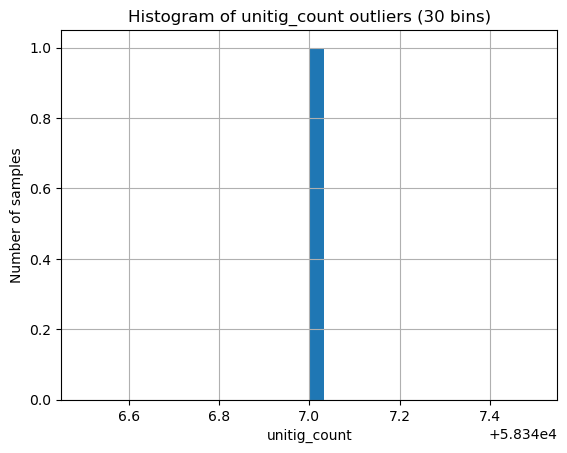

      sample_id  unitig_count  base_count  kmer_count  singletons  %single  \
1086  ERR177156         58347     5659889     4074425      164946     4.05   

      average_coverage  
1086         92.194826  


In [6]:
# identify outliers for unitig_count

# pull out the outliers

# filter out rows of unitig_summary_with_average_coverage
# where the unitig_count is greater than 10000
unitig_summary_with_average_coverage_filtered_outliers = \
    unitig_summary_with_average_coverage[
        unitig_summary_with_average_coverage[
            'unitig_count']>40000]

# > 20000 there was 1
# > 10000 there were 5
# > 5000 there were 21
# > 4000 there were 32
print(unitig_summary_with_average_coverage_filtered_outliers)

unitig_summary_with_average_coverage_filtered_outliers.hist(column='unitig_count', bins=30)

plt.xlabel('unitig_count')
plt.ylabel('Number of samples')
plt.title('Histogram of unitig_count outliers (30 bins)')
plt.show()

print(unitig_summary_with_average_coverage_filtered_outliers )


# to search for the "main" distribution without outliers, you
# can change this variable:
top_limit = 10000 # e.g. 10000, etc
# can also change the "<" below to a ">"

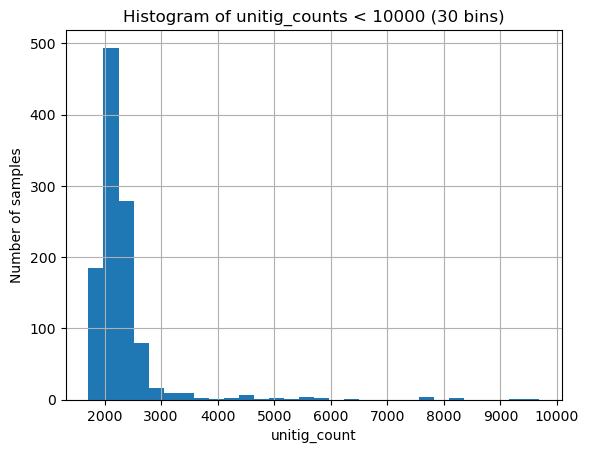

In [7]:
# filter out rows of unitig_summary_with_average_coverage
# where the unitig_count is greater than 10000
unitig_summary_with_average_coverage_filtered_less = \
    unitig_summary_with_average_coverage[
        unitig_summary_with_average_coverage[
            'unitig_count'] < top_limit]

unitig_summary_with_average_coverage_filtered_less.hist(
    column='unitig_count', bins=30)

plt.xlabel('unitig_count')
plt.ylabel('Number of samples')
plt.title('Histogram of unitig_counts < 10000 (30 bins)')
plt.show()

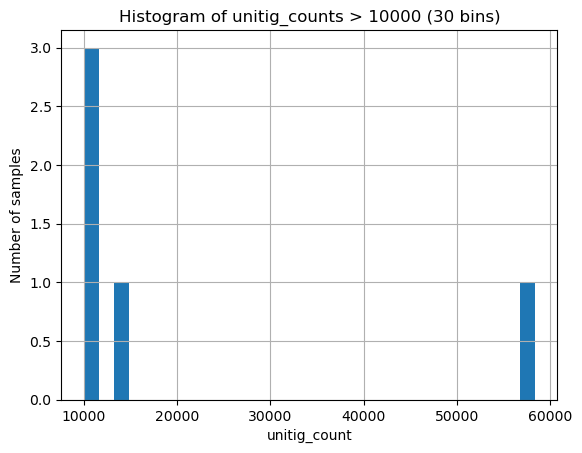

In [8]:
# filter out rows of unitig_summary_with_average_coverage
# where the unitig_count is less than 10000
unitig_summary_with_average_coverage_filtered_greater = \
    unitig_summary_with_average_coverage[
        unitig_summary_with_average_coverage[
            'unitig_count'] > 10000]


unitig_summary_with_average_coverage_filtered_greater.hist(
    column='unitig_count', bins=30)

plt.xlabel('unitig_count')
plt.ylabel('Number of samples')
plt.title('Histogram of unitig_counts > 10000 (30 bins)')
plt.show()


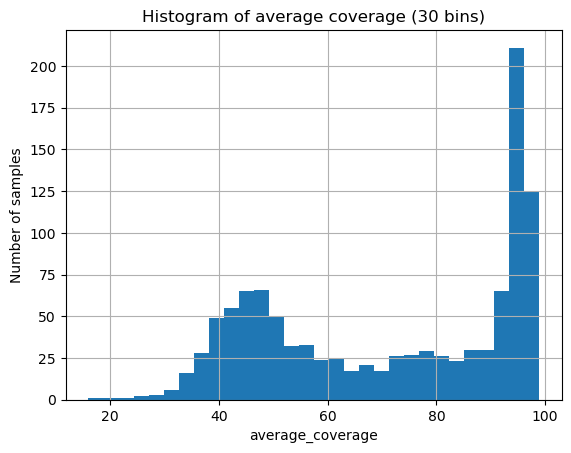

In [9]:
# Plot the number of unitigs generated per isolate,
# against the coverage depth

# histogram of the sample_id against the average coverage
unitig_summary_with_average_coverage.hist(column='average_coverage', bins=30)
#unitig_summary_with_average_coverage.plot(x='sample_id', y='average_coverage', style='o')
plt.xlabel('average_coverage')
plt.ylabel('Number of samples')
plt.title('Histogram of average coverage (30 bins)')
plt.show()

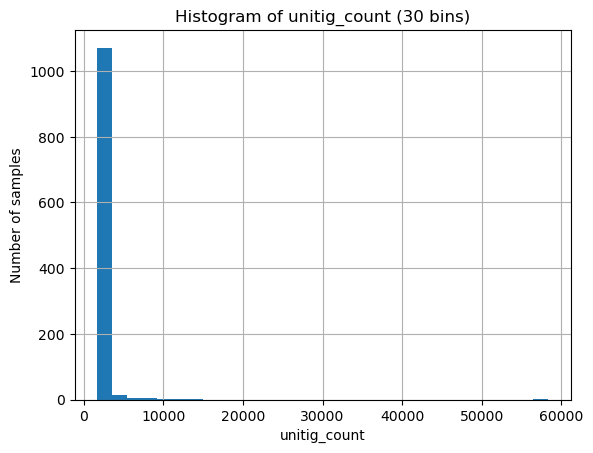

In [10]:
# histogram of the sample_id against the unitig_count

unitig_summary_with_average_coverage.hist(column='unitig_count', bins=30)

plt.xlabel('unitig_count')
plt.ylabel('Number of samples')
plt.title('Histogram of unitig_count (30 bins)')
plt.show()

Empty DataFrame
Columns: [sample_id, unitig_count, base_count, kmer_count, singletons, %single, average_coverage]
Index: []


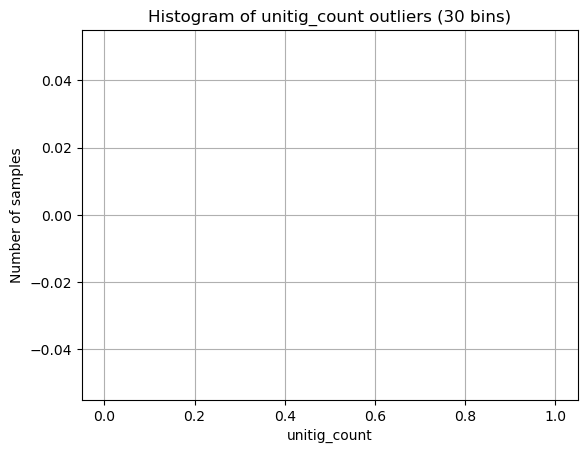

Empty DataFrame
Columns: [sample_id, unitig_count, base_count, kmer_count, singletons, %single, average_coverage]
Index: []


In [11]:
# filter out rows of unitig_summary_with_average_coverage
# where the unitig_count is greater than 10000
unitig_summary_with_average_coverage_filtered_outliers = \
    unitig_summary_with_average_coverage[
        unitig_summary_with_average_coverage[
            'unitig_count']>60000]

# > 20000 there was 1
# > 10000 there were 5
# > 5000 there were 21
# > 4000 there were 32
print(unitig_summary_with_average_coverage_filtered_outliers)

unitig_summary_with_average_coverage_filtered_outliers.hist(column='unitig_count', bins=30)

plt.xlabel('unitig_count')
plt.ylabel('Number of samples')
plt.title('Histogram of unitig_count outliers (30 bins)')
plt.show()

print(unitig_summary_with_average_coverage_filtered_outliers )

# to search for the "main" distribution without outliers, you
# can change this variable:
top_limit = 4000    # e.g. 10000, etc
# can also change the "<" below to a ">"


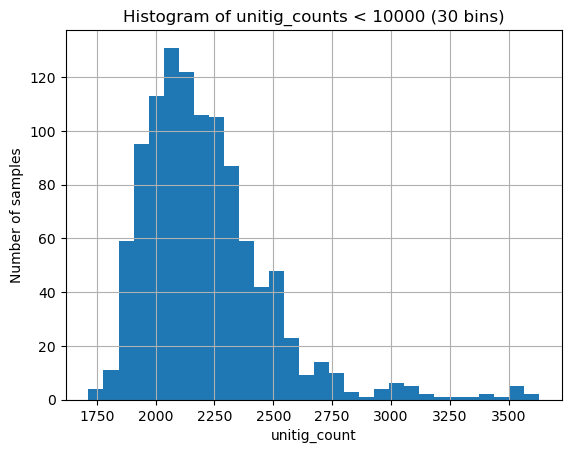

In [12]:
# filter out rows of unitig_summary_with_average_coverage
# where the unitig_count is greater than 10000
unitig_summary_with_average_coverage_filtered_less = \
    unitig_summary_with_average_coverage[
        unitig_summary_with_average_coverage[
            'unitig_count'] < top_limit]

unitig_summary_with_average_coverage_filtered_less.hist(
    column='unitig_count', bins=30)

plt.xlabel('unitig_count')
plt.ylabel('Number of samples')
plt.title('Histogram of unitig_counts < 10000 (30 bins)')
plt.show()

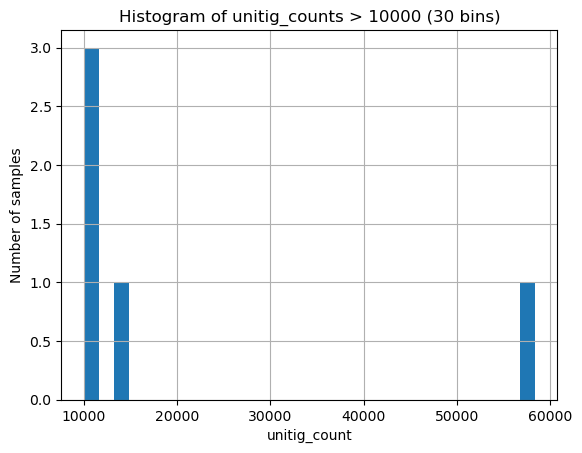

In [13]:
# filter out rows of unitig_summary_with_average_coverage
# where the unitig_count is less than 10000
unitig_summary_with_average_coverage_filtered_greater = \
    unitig_summary_with_average_coverage[
        unitig_summary_with_average_coverage[
            'unitig_count'] > 10000]

# remove the outliers from unitig_summary_with_average_coverage


unitig_summary_with_average_coverage_filtered_greater.hist(
    column='unitig_count', bins=30)

plt.xlabel('unitig_count')
plt.ylabel('Number of samples')
plt.title('Histogram of unitig_counts > 10000 (30 bins)')
plt.show()

In [14]:
# REMOVE OUTLIERS
# This will only be removed from the core dataframe created by the merge
# earlier and not from the source dataframes, because they are no
# longer

# all unitig_counts above 6500 and base_counts above 3.2M are
# statistically outliers and precisely match.
print("*"*80)
print("OUTLIER COMPARISON")
print(unitig_summary_with_average_coverage[
    unitig_summary_with_average_coverage['unitig_count'] > 6500]['sample_id'].to_numpy())
print("*"*80)
print(unitig_summary_with_average_coverage[
    unitig_summary_with_average_coverage['base_count'] > 3200000]['sample_id'].to_numpy())
print("*"*80)

# list of the outliers
unitig_outliers = unitig_summary_with_average_coverage[
    unitig_summary_with_average_coverage['base_count'] > 3200000]['sample_id']

********************************************************************************
OUTLIER COMPARISON
['ERR171907' 'ERR171908' 'ERR109547' 'ERR177226' 'ERR158992' 'ERR084680'
 'ERR177155' 'ERR223120' 'ERR223125' 'ERR156506' 'ERR156441' 'ERR177156']
********************************************************************************
['ERR171907' 'ERR171908' 'ERR109547' 'ERR177226' 'ERR158992' 'ERR084680'
 'ERR177155' 'ERR223120' 'ERR223125' 'ERR156506' 'ERR156441' 'ERR177156']
********************************************************************************


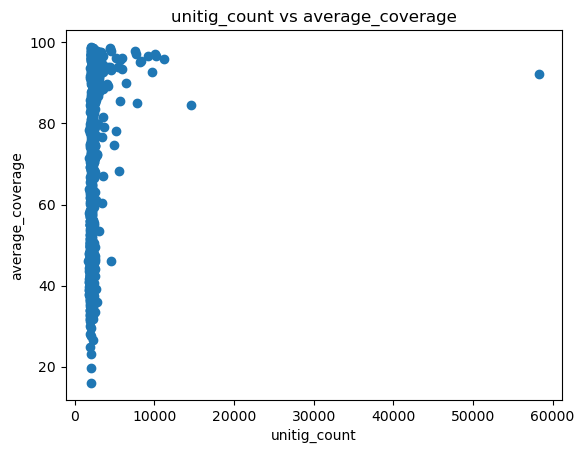

In [15]:
# plot a graph of the unitig_count against the average_coverage including outliers
unitig_summary_with_average_coverage.plot(x='unitig_count', y='average_coverage', style='o', legend=False)
plt.xlabel('unitig_count')
plt.ylabel('average_coverage')
plt.title('unitig_count vs average_coverage')
plt.show()

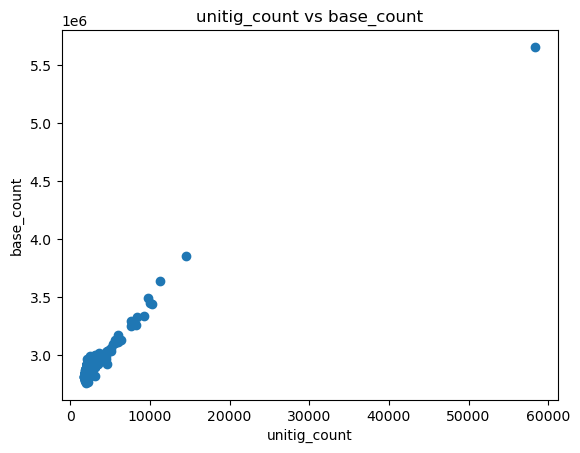

58347
6404


In [16]:
# plot a graph of the unitig_count against the base_count including outliers
unitig_summary_with_average_coverage.plot(x='unitig_count', y='base_count', style='o', legend=False)
plt.xlabel('unitig_count')
plt.ylabel('base_count')
plt.title('unitig_count vs base_count')
plt.show()
unitig_summary_with_average_coverage_with_outliers = unitig_summary_with_average_coverage.copy()
# remove outliers
print(unitig_summary_with_average_coverage['unitig_count'].max())
unitig_summary_with_average_coverage = unitig_summary_with_average_coverage[
    unitig_summary_with_average_coverage['unitig_count'] <= 6500]
print(unitig_summary_with_average_coverage['unitig_count'].max())

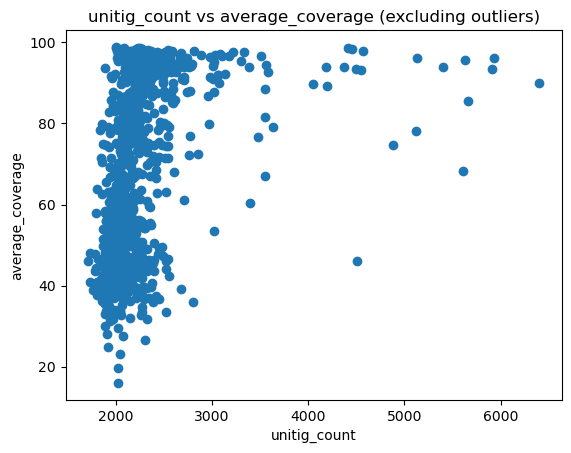

In [17]:
# plot a graph of the unitig_count against the average_coverage excluding outliers
unitig_summary_with_average_coverage.plot(x='unitig_count', y='average_coverage', style='o', legend=False)
plt.xlabel('unitig_count')
plt.ylabel('average_coverage')
plt.title('unitig_count vs average_coverage (excluding outliers)')
plt.show()

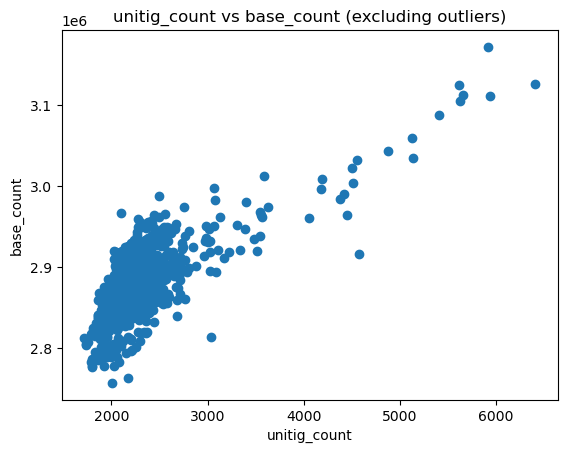

In [18]:
# plot a graph of the unitig_count against the base_count excluding outliers
unitig_summary_with_average_coverage.plot(x='unitig_count', y='base_count', style='o', legend=False)
plt.xlabel('unitig_count')
plt.ylabel('base_count')
plt.title('unitig_count vs base_count (excluding outliers)')
plt.show()

In [19]:
# unitig_count and base_count show some linear relationship
# so run a correlation test on them
print("Correlation between unitig_count and base_count:")
print(unitig_summary_with_average_coverage[['unitig_count', 'base_count']].corr())
# also run a linear regression test on them using sklearn
from sklearn.linear_model import LinearRegression
X = unitig_summary_with_average_coverage[['unitig_count']]
y = unitig_summary_with_average_coverage[['base_count']]
model = LinearRegression().fit(X,y)
print("Linear regression between unitig_count and base_count:")
print("Slope: ", model.coef_)
print("y-intercept: ", model.intercept_)
print("R^2: ", model.score(X,y))

# unitig_count = 69.9 * base_count + 2717882

Correlation between unitig_count and base_count:
              unitig_count  base_count
unitig_count      1.000000    0.750165
base_count        0.750165    1.000000
Linear regression between unitig_count and base_count:
Slope:  [[69.91768891]]
y-intercept:  [2717882.1217266]
R^2:  0.5627480706199833


In [20]:
# load in the xls file strain-ids.xls
xls_file = "strain-ids.xls"
strain_ids = pd.read_excel(xls_file)

strain_ids.rename(columns={'ENA_accession': 'sample_id'}, inplace=True)

print(strain_ids.head().to_string())

   sample_id strainid Hospital Incl/Excl
0  ERR084492  ASARM61  East 2G   Include
1  ERR084493  ASARM59  East 2G   Include
2  ERR084494  ASARM62  East 2G   Include
3  ERR084496  ASARM64  East 2G   Include
4  ERR084497  ASARM65  East 2G   Include


In [21]:
unitig_summary_hospital = unitig_summary_with_average_coverage.merge(
    strain_ids[['sample_id', 'Hospital']],
    on='sample_id', how="left")
print(unitig_summary_hospital.head().to_string())

   sample_id  unitig_count  base_count  kmer_count  singletons  %single  average_coverage     Hospital
0  ERR107890          2028     2878647     2893215       75408     2.61         49.140136       WalesA
1  ERR111073          2172     2925851     2939090       78399     2.67         41.007916      East 2G
2  ERR118571          2115     2851120     2855749       68079     2.38         64.615049  South-WestD
3  ERR134395          3077     2983556     3035637      144391     4.76         89.899949      East 2B
4  ERR156445          2256     2904381     2921325       84624     2.90         82.114550      East-1B


In [22]:
print("%"*80)
unitig_summary_hospital_with_outliers = unitig_summary_with_average_coverage_with_outliers.merge(
    strain_ids[['sample_id', 'Hospital']],
    on='sample_id', how="left")
"""print(f"{unitig_outliers=}")
print(f"{unitig_summary_hospital['sample_id']=}")
print(f"{unitig_summary_hospital['sample_id'].isin(unitig_outliers)=}")"""
# display hospitals which contain outlier sample ids
outlier_hospitals = unitig_summary_hospital_with_outliers[
     unitig_summary_hospital_with_outliers['sample_id'].isin(unitig_outliers)]['Hospital'].unique()
print(f"Outlier hospitals = {outlier_hospitals}")
print("%"*80)

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Outlier hospitals = ['East 2G' 'East 2E' 'East 2D' 'East-1B']
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


In [25]:
# groupby() hospital to get various stats
hospital_coverage_mean = unitig_summary_hospital.groupby('Hospital')['average_coverage'].mean()

# sort this by mean coverage
hospital_coverage_mean = hospital_coverage_mean.sort_values(ascending=False)

# Print the sorted mean coverage values
print(hospital_coverage_mean.to_string())

# Save the sorted mean coverage DataFrame to an Excel file
hospital_coverage_mean.to_excel('hospital_stats.xlsx', header=True)


Hospital
South-EastA               95.815397
Northern IrelandB         92.978406
North-East 2A             92.192810
East 2D                   91.727671
East-1G                   91.142562
East-1E                   90.238264
East-1F                   90.221528
East-1B                   88.092747
East 2C                   84.194055
ScotlandF                 80.470557
ScotlandE                 80.403091
SouthCentralA             75.896682
East 2F                   75.705448
Northern IrelandD         75.471372
East-1A                   75.457517
West-MidlandsA            74.292972
South-EastD               71.548717
East-1D                   71.010568
South-WestD               69.765182
North-West 2A             69.671306
East 2B                   69.346900
ScotlandB                 69.052057
South-WestA               69.046360
East 2G                   68.763678
North-CentralA            68.744567
North-West 1A             67.510461
East 2E                   66.741516
WalesA             

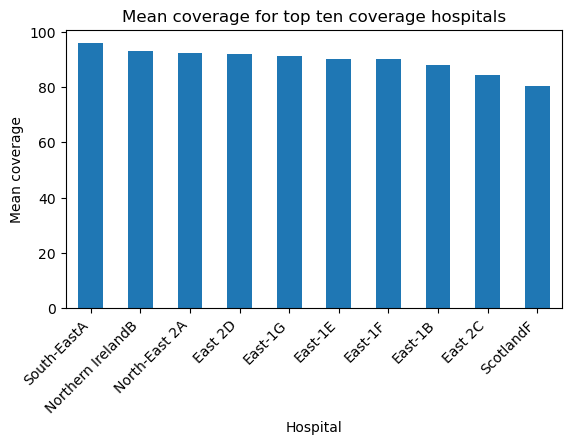

In [26]:
hospital_coverage_mean.iloc[:10].plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)
plt.xlabel('Hospital')
plt.ylabel('Mean coverage')
plt.title('Mean coverage for top ten coverage hospitals')
plt.show()

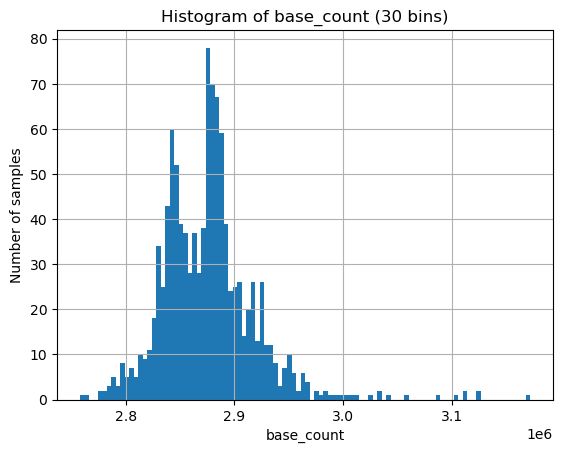

In [27]:
# histogram of base_count
unitig_summary_with_average_coverage.hist(column='base_count', bins=100)
plt.xlabel('base_count')
plt.ylabel('Number of samples')
plt.title('Histogram of base_count (30 bins)')
plt.show()